In [2]:
# Install required libraries
!pip install nltk wordcloud scikit-learn gradio

# Imports
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import gradio as gr

# Download required NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load data (replace path with your file)
df = pd.read_excel("/content/BankReviews.xlsx")
df.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [8]:
df=df.drop(["BankName","Date"],axis=1)

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Clean text
df['Reviews_clean'] = df['Reviews'].astype(str).str.lower()
df['Reviews_clean'] = df['Reviews_clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['Reviews_clean'] = df['Reviews_clean'].apply(lambda x: " ".join(x.split()))

# Tokenization
df['Tokens'] = df['Reviews_clean'].apply(nltk.word_tokenize)

In [22]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [23]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Tokens'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [24]:
# Join tokens back to text
df['Clean_Text'] = df['Tokens'].apply(lambda x: " ".join(x))

In [25]:
# Word frequency
from collections import Counter
all_words = [word for tokens in df['Tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(20)
print("Most Frequent Words:", word_freq)

Most Frequent Words: [('x000d', 713), ('loan', 326), ('process', 248), ('would', 246), ('time', 217), ('u', 209), ('home', 194), ('read', 190), ('morex000d', 187), ('mortgage', 151), ('recommend', 150), ('rate', 140), ('great', 139), ('work', 137), ('closing', 136), ('made', 117), ('team', 112), ('experience', 110), ('question', 106), ('service', 103)]


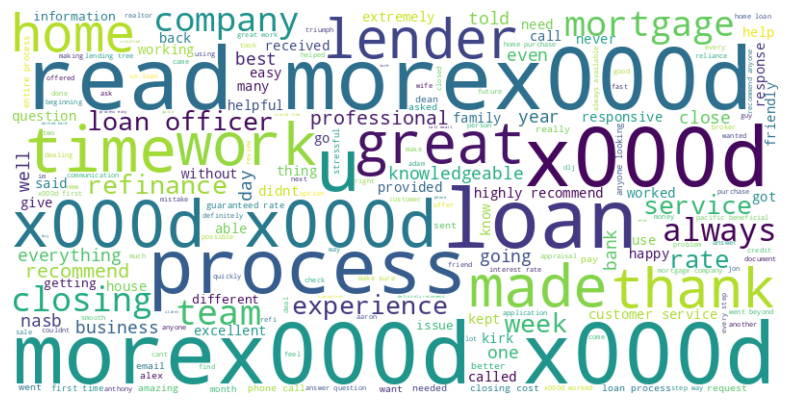

In [26]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Stars']

In [28]:
# Resampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
# Logistic Regression with balanced weights
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print("Logistic Regression Report:")
print(classification_report(y_test, lr.predict(X_test)))


Logistic Regression Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        84

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164



In [30]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("Naive Bayes Report:")
print(classification_report(y_test, nb.predict(X_test)))

Naive Bayes Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        80
           5       0.98      1.00      0.99        84

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



Most Frequent Words: [('x000d', 713), ('loan', 326), ('process', 248), ('would', 246), ('time', 217), ('u', 209), ('home', 194), ('read', 190), ('morex000d', 187), ('mortgage', 151), ('recommend', 150), ('rate', 140), ('great', 139), ('work', 137), ('closing', 136), ('made', 117), ('team', 112), ('experience', 110), ('question', 106), ('service', 103)]


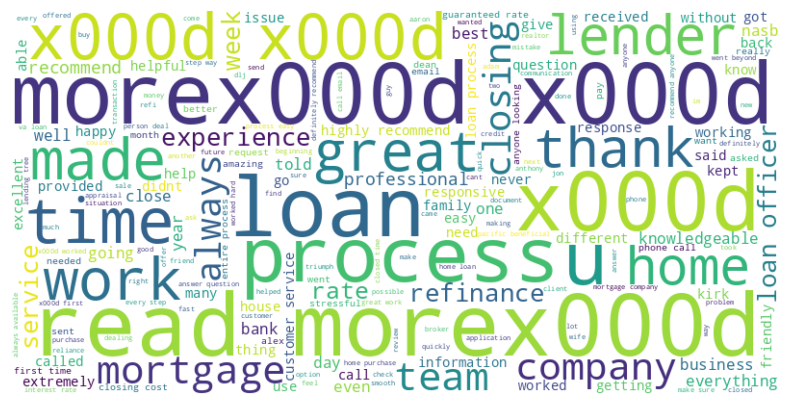

Logistic Regression Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        84

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

Naive Bayes Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        80
           5       0.98      1.00      0.99        84

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set de

In [18]:
# Gradio App
def predict_sentiment(text):
    text_clean = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text_clean)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = " ".join(tokens)
    vectorized = vectorizer.transform([clean_text])
    pred = nb.predict(vectorized)[0]
    return f"Predicted Sentiment: {pred}"

interface = gr.Interface(fn=predict_sentiment,
                         inputs=gr.Textbox(lines=2, placeholder="Enter a bank review..."),
                         outputs="text",
                         title="Bank Review Sentiment Classifier")

interface.launch()


In [21]:
df[df['Stars'] == 5].head()


,Stars,Reviews,Reviews_clean,Tokens,Clean_Text
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...,"[great, job, wyndham, capital, person, profess...",great job wyndham capital person professional ...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",matthew richardson professional helpful helped...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...,"[past, experience, wyndham, mortgage, would, w...",past experience wyndham mortgage would without...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...,"[dealing, brad, thomka, beginning, started, st...",dealing brad thomka beginning started stressfu...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...,"[cant, express, grateful, support, zach, provi...",cant express grateful support zach provided fa...
